### 한글폰트

In [1]:
!sudo apt-get update -qq # 폰트 설정을 위한 코드
!sudo apt-get install fonts-nanum* -qq
!sudo fc-cache -fv

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

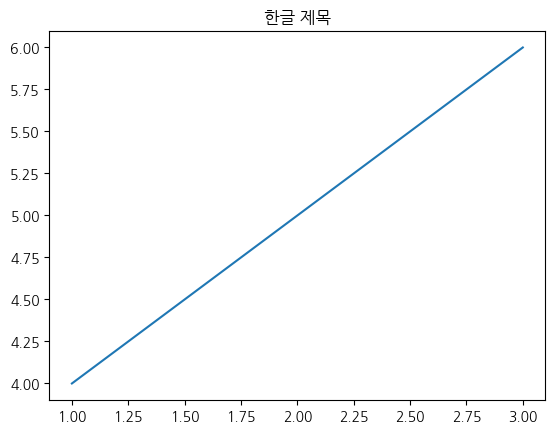

In [3]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목') # 한글 제목이 정상적으로 표시되는지 확인
plt.show()

## 데이터 다운로드

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gyunjaewon","key":"b95ad6fda4b8fff20897c14bcddbf4b0"}'}

In [5]:
# Make a directory named kaggle and copy the kaggle. json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle competitions download -c aiffel-dl-thon-dktc-online-14

aiffel-dl-thon-dktc-online-14.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
file_name = "/content/aiffel-dl-thon-dktc-online-14.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## 데이터 처리

In [8]:
import pandas as pd

# 데이터 읽기
train_data = pd.read_csv('./train.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

In [9]:
train_data.head()

,class,conversation
idx,,
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [10]:
test_data.head()

,text
idx,
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [16]:
# 데이터 프레임 정보 확인 (열, 결측치 등)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 0 to 3949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         3950 non-null   object
 1   conversation  3950 non-null   object
dtypes: object(2)
memory usage: 92.6+ KB
None


In [11]:
class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [19]:
# 'class' 열의 고유값별 개수 세기
class_counts = train_data['class'].value_counts()

# 결과 출력
print("클래스별 데이터 개수:\n", class_counts)

# 비율 계산 및 출력
class_proportions = train_data['class'].value_counts(normalize=True) * 100
print("\n클래스별 데이터 비율 (%):\n", class_proportions)

클래스별 데이터 개수:
 class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64

클래스별 데이터 비율 (%):
 class
기타 괴롭힘 대화      27.696203
갈취 대화          24.835443
직장 내 괴롭힘 대화    24.784810
협박 대화          22.683544
Name: proportion, dtype: float64


In [12]:
x_train = train_data['conversation']
y_train = train_data['class']

## 데이터 길이, 클래스 분포 확인

데이터 정보
--------------------------------------------------
x_train : (3950,)
y_train : (3950,)
label 종류: {'갈취 대화', '직장 내 괴롭힘 대화', '협박 대화', '기타 괴롭힘 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :226.57088607594937


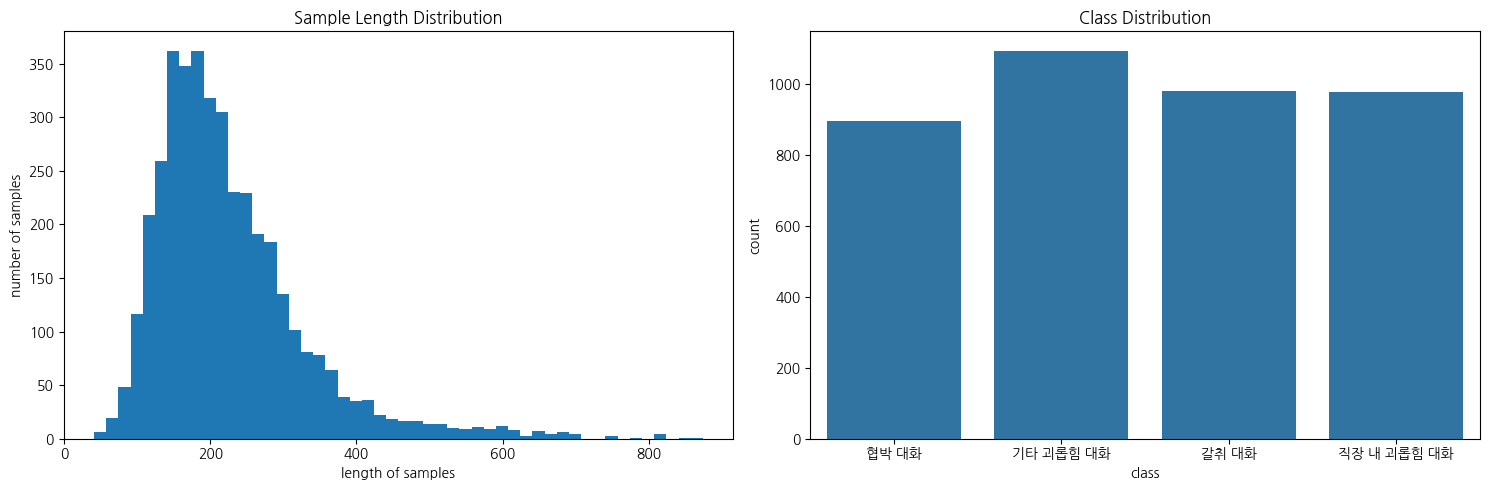

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
import numpy as np
import pandas as pd
import seaborn as sns

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

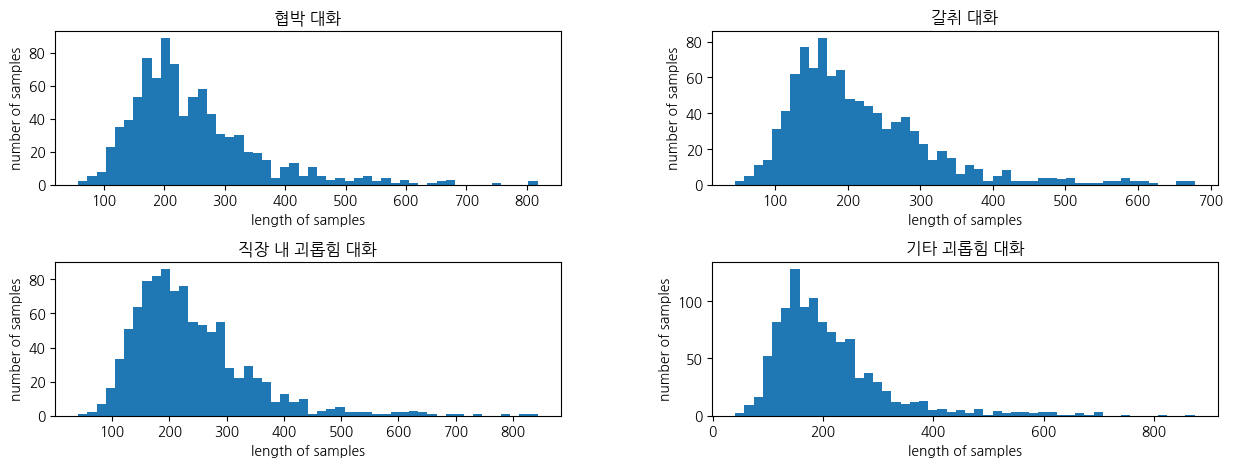

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [22]:
from collections import Counter
import re

# 불용어(stop_words) 목록 정의 (조사, 접속사 등)
# 일단은 작은 불용어 사전을 이용하여 빈도수 측정
stop_words = ['은', '는', '이', '가', '다', '을', '를', '에', '와', '과', '에서']

# 텍스트 전처리 및 키워드 추출 함수
def get_keywords(text):
    text = re.sub(r'[^가-힣\s]', '', text) # 한글과 공백만 남기기
    words = text.split()
    return [word for word in words if word not in stop_words and len(word) > 1] # 불용어 및 한 글자 단어 제거

# 각 클래스별 키워드 빈도 분석
for cls in train_data['class'].unique():
    class_df = train_data[train_data['class'] == cls]
    all_text = ' '.join(class_df['conversation'])
    keywords = get_keywords(all_text)

    # 상위 10개 키워드 출력
    print(f"\n--- {cls}의 주요 키워드 ---")
    print(Counter(keywords).most_common(10))


--- 협박 대화의 주요 키워드 ---
[('내가', 923), ('제발', 397), ('지금', 337), ('진짜', 311), ('그냥', 241), ('니가', 241), ('그래', 228), ('죄송합니다', 222), ('아니', 219), ('그럼', 208)]

--- 기타 괴롭힘 대화의 주요 키워드 ---
[('내가', 647), ('진짜', 440), ('아니', 375), ('그냥', 314), ('그래', 245), ('지금', 233), ('아니야', 225), ('그렇게', 223), ('무슨', 222), ('니가', 218)]

--- 갈취 대화의 주요 키워드 ---
[('내가', 704), ('진짜', 400), ('그럼', 366), ('이거', 362), ('아니', 343), ('지금', 316), ('그래', 273), ('돈이', 255), ('없어', 241), ('그냥', 237)]

--- 직장 내 괴롭힘 대화의 주요 키워드 ---
[('죄송합니다', 840), ('내가', 535), ('아니', 389), ('제가', 386), ('지금', 324), ('그럼', 275), ('오늘', 243), ('부장님', 239), ('무슨', 217), ('그렇게', 199)]
